In [346]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


import warnings
warnings.filterwarnings('ignore')

In [312]:
df = pd.read_csv("../ML_в_бизнесе/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

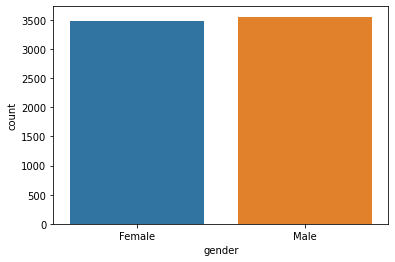

In [314]:
sns.countplot(df.gender)
plt.show()

In [315]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

#### 2. Какое количество уникальных значений у поля InternetService?

In [316]:
df['InternetService'].nunique()

3

#### 3. Выведите статистики по полю TotalCharges (median, mean, std).
для подсчета статистик необходимо изменить тип данных

In [317]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [318]:
df['TotalCharges'].describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

т.е. тип данных object, то и статистика соответствующая.... никаких mean, median и std

#### 4. Сделайте замену значений поля PhoneService на числовые (Yes->1, No->0)

In [319]:
df['PhoneService'] = df['PhoneService'].replace({'Yes':1, 'No':0})

In [320]:
df['PhoneService'].value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

#### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

In [321]:
df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)

In [322]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [323]:
df["TotalCharges"].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [324]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [325]:
df['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

#### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [326]:
df['Churn'] = df['Churn'].replace({'Yes':1, 'No':0})

In [327]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

#### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport на числовые (Yes -> 1, No -> 0, No internet service->0)

In [328]:
change_ = ['StreamingMovies', 'StreamingTV', 'TechSupport']

for i in change_:
    df[i] = df[i].replace({'Yes':1, 'No':0, 'No internet service': 0})

    print('Замена для поля', i,':\n', df[i].value_counts())


Замена для поля StreamingMovies :
 0    4311
1    2732
Name: StreamingMovies, dtype: int64
Замена для поля StreamingTV :
 0    4336
1    2707
Name: StreamingTV, dtype: int64
Замена для поля TechSupport :
 0    4999
1    2044
Name: TechSupport, dtype: int64


#### 8. Заполните пропуски в поле PhoneService значением 0

In [329]:
df['PhoneService'] = df['PhoneService'].fillna(0)

#### 8. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [330]:
columns_ = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']

df = df[columns_]

In [331]:
df.head(3)

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.85,0,0,0,0
1,Male,34,1,1889.50,0,0,0,0
2,Male,2,1,108.15,0,0,0,1


#### 9. Разделите датасет на тренировочную и тестовую выборку

In [332]:
features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']
target = 'Churn'

In [333]:
X = df.drop(columns=target)
y = df[target]

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)

##### 10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [335]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([
     ('gender_selector', ColumnSelector(key='gender')), 
     ('gender_encoder', OHEEncoder(key='gender'))
])

#### 11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [336]:
gender.fit_transform(X_train, y_train)

,gender_Female,gender_Male
6790,1,0
4156,0,1
710,0,1
1335,0,1
1661,1,0
...,...,...
6512,0,1
48,0,1
772,1,0
5944,0,1


#### 12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#### Вопрос - в каких случаях это может быть полезно?

In [337]:
tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])

Нормализация м.б. полезна при наличии выбросов, т.к. экстремальные значения могут повлиять на 
итоговый результат работы модели

#### 13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [338]:
TotalCharges =  Pipeline([
                ('selector', NumberSelector(key='TotalCharges')),
                ('standard', StandardScaler())
            ])

In [339]:
number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies', 'StreamingTV', 
                                                 'TechSupport']))
            ])

In [340]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', TotalCharges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

In [341]:
pipeline = Pipeline([
    ('features', feats),
    ('classifier', RandomForestClassifier(random_state=42)),
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
          

#### 14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [344]:
pip_pred = pipeline.predict_proba(X_test)

In [345]:
pip_pred

array([[0.08, 0.92],
       [1.  , 0.  ],
       [0.88, 0.12],
       ...,
       [0.92, 0.08],
       [0.98, 0.02],
       [0.85, 0.15]])

####  15. Посчитайте метрики качества получившейся модели (roc_auc)

In [348]:
roc_auc_score(y_test, pip_pred[:,1])

0.7641615393069725

In [350]:
import dill
with open("model_RF.dill", "wb") as f:
    dill.dump(pipeline, f)